# Declaration of Originality

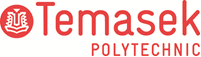

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  :   Low Feng Hao, Esmond
* Tutorial Group                :   TC07
* Tutor						    :   Ms Esther Goh
* Submission Date               :   11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [80]:
## Import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# 1. Business Understanding
#### Context:
**The COVID-19 pandemic has placed an unprecedented strain on health systems, with rapidly increasing demand for healthcare in hospitals and intensive care units (ICUs) worldwide. As the pandemic escalates, determining the resulting needs for healthcare resources (beds, staff, equipment) has become a key priority for many countries. Projecting future demand requires estimates of how long patients with COVID-19 need different levels of hospital care.**
**While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.**
**The problem is to manage the functioning of Hospitals in a professional and optimal manner.**

#### Goal:
**To predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning. The length of stay is divided into 11 different classes ranging from 0-10 days to more than 100 days.**

Source: https://www.kaggle.com/datasets/arashnic/covid19-hospital-treatment/data

# 2. Data Understanding

## 2.1 Load dataset

In [81]:
## Read *.csv file into pandas DataFrame
FILE_PATH = 'hospital.csv'
df = pd.read_csv(FILE_PATH)
df

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,0,6,0,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,0,1,0,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,0,4,0,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,1,2,1,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


Based on the data given here and from the business understanding, Stay_Days is the target we are trying to predict, while the rest of the columns are just the features. Additionally, what I can tell is that there are indeed some unnecessary data I can already pinpoint (such as unnecessary ids), which I can remove later. Furthermore, I notice that hospital, hospital_type, hospital_city, and hospital_region have some numerical values which I believe is just the number that classifies each value in those columns

## 2.2 Summary Statistics

In [82]:
## Understand the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

Seeing that the data type for Hospital, Hospital_type, Hospital_city, Hospital_region are in int64, this shows that I was right that the numerical values are just numbers that classifies each value in those columns

In [83]:
## Check for missing data
df.isna().sum()

case_id                                 0
Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

In [84]:
#Since got missing data for the bed grades and city codes, and it is not really a lot of rows that are missing, just drop all rows that has missing
df = df.dropna()

In [85]:
df.describe(include="all")
#provides the summary statistics of all columns

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
count,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793.000000,313793,313793,313793,313793.000000,313793.000000,313793.000000,313793,313793,313793.000000,313793,313793.000000,313793
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,6,6,NaN,NaN,NaN,3,3,NaN,10,NaN,11
top,NaN,NaN,NaN,NaN,NaN,NaN,gynecology,R,F,NaN,NaN,NaN,Trauma,Moderate,NaN,31-40,NaN,21-30
freq,NaN,NaN,NaN,NaN,NaN,NaN,245850,126104,111006,NaN,NaN,NaN,150252,173425,NaN,62760,NaN,86316
mean,158937.911120,18.326419,1.257781,4.778169,0.780358,3.196419,NaN,NaN,NaN,2.622952,65743.029382,7.252447,NaN,NaN,3.280857,NaN,4881.893165,NaN
std,91939.506976,8.633613,1.535338,3.103237,0.752329,1.167924,NaN,NaN,NaN,0.872618,37978.083237,4.745243,NaN,NaN,1.761758,NaN,1086.243945,NaN
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,0.000000,NaN,1800.000000,NaN
25%,79271.000000,11.000000,0.000000,2.000000,0.000000,2.000000,NaN,NaN,NaN,2.000000,32833.000000,4.000000,NaN,NaN,2.000000,NaN,4188.000000,NaN
50%,158950.000000,19.000000,1.000000,5.000000,1.000000,3.000000,NaN,NaN,NaN,3.000000,65735.000000,8.000000,NaN,NaN,3.000000,NaN,4742.000000,NaN
75%,238399.000000,26.000000,2.000000,7.000000,1.000000,4.000000,NaN,NaN,NaN,3.000000,98472.000000,8.000000,NaN,NaN,4.000000,NaN,5410.000000,NaN


In [86]:
#Getting the unique values of object columns just to see the values to ensure dataset matches the description from the source
col_categorical = df.select_dtypes(include=['object']).columns
for col in df[col_categorical]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}')
print('\n')
col_number = df.select_dtypes(include=['int64', 'float64']).columns
for col in df[col_number]:
    print(f'{col} ({df[col].nunique()}): {df[col].unique()}')

Department (5): ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
Ward_Type (6): ['R' 'S' 'Q' 'P' 'T' 'U']
Ward_Facility (6): ['F' 'E' 'D' 'B' 'A' 'C']
Type of Admission (3): ['Emergency' 'Trauma' 'Urgent']
Illness_Severity (3): ['Extreme' 'Moderate' 'Minor']
Age (10): ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']
Stay_Days (11): ['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']


case_id (313793): [     1      2      3 ... 318436 318437 318438]
Hospital (32): [ 8  2 10 26 23 32  1 22 16  9  6 29 12  3 21 28 27 19  5 14 13 31 24 17
 25 15 11 30 18  4  7 20]
Hospital_type (7): [2 4 1 0 5 3 6]
Hospital_city (11): [ 3  5  1  2  6  9 10  4 11  7 13]
Hospital_region (3): [2 0 1]
Available_Extra_Rooms_in_Hospital (18): [ 3  2  1  4  6  5  7  8  9 10 12  0 11 20 14 21 13 24]
Bed_Grade (4): [2. 3. 4. 1.]
patientid (90344): [ 31397  63418   8088 ... 125235  91081  21641]
City_Code_

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

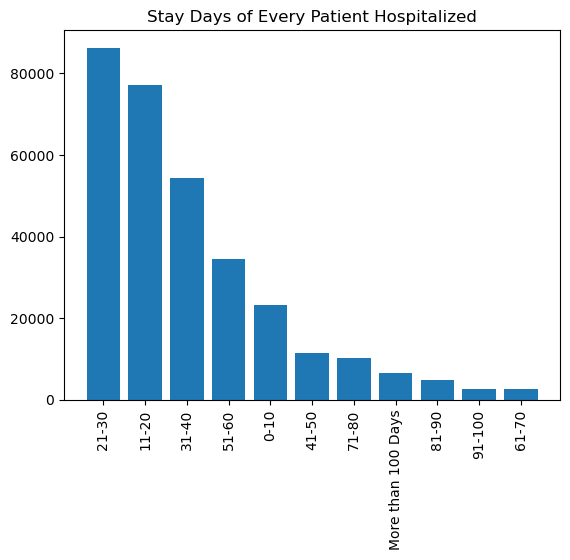

In [87]:
## Understanding distribution of target
target = df['Stay_Days']
get_target = target.value_counts() #get counts of each category of stay days to be displayed in the data
plt.xticks(rotation=90) #rotate labels for readability
plt.bar(get_target.index, get_target.values)
plt.title('Stay Days of Every Patient Hospitalized')
plt.show()

Based on the distribution of the target (number of stay days for each patient) by using a bar graph, we can see that most patients (with more than 80,000 + patients) have stayed for at least 21 to 30 days in a hopsital.

However, there are only a small amount of patients who have stayed for 61 days or more. This shows an imbalance in the target and our model will not be able to focus on broader patterns. Additionally, notice how the stay days has multiple categories, which hence gives us a multi-class classification problem, where it will be harder for the model to learn and distinguish different and imbalanced patterns. Therefore, I will be regrouping the target into two categories: '30 days or less' & '31 days or more', which turns this into a binary classification problem, where the model will now make an easier decision in making predictions as now the minority classes (such as stays days above 61) will provide more weight, balancing the distribution better and increasing the model accuracy.

In [88]:
#function to group the stay days
def combine_stay_days(value):
    if value in ['31-40','41-50','51-60','61-70', '71-80', '81-90', '91-100', 'More than 100 Days']:
        return '31 days or more'
    elif value in ['21-30', '0-10', '11-20']:
        return '30 days or less'
# Apply to your dataframe
df['Stay_Days'] = df['Stay_Days'].apply(combine_stay_days)
# binary encode so one category becomes 0, the other becomes 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
target = le.fit_transform(df['Stay_Days'])

C:\Users\User\AppData\Local\Temp\ipykernel_15944\868781686.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stay_Days'] = df['Stay_Days'].apply(combine_stay_days)


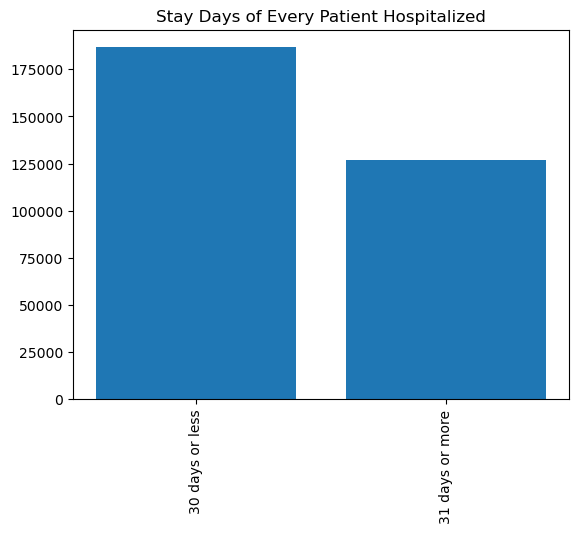

In [89]:
## Understanding distribution of the target with the newly grouped category
target = df['Stay_Days']
get_target = target.value_counts() #get counts of each category of stay days to be displayed in the data
plt.xticks(rotation=90) #rotate labels for readability
plt.bar(get_target.index, get_target.values)
plt.title('Stay Days of Every Patient Hospitalized')
plt.show()
#now our data looks way more balanced!

### 2.3.1.2 Understanding distribution of features

In [90]:
# But before that lets remove any unnecessary columns, such as case_id, patientid, Admission_Deposit (because it just provides us with the cost of the admission that they have already paid for, so it should not be such a huge factor) along with Stay_Days cause it is the target
# caseid + patientid are irrelevant because we dont need extra ids
features = df.drop(['case_id', 'patientid', 'Stay_Days', 'Admission_Deposit'], axis=1)
old_features = features #get the original features before any feature engineering/changes to the features
features
# I was kind of originally thinking about removing city_code_patient because it may be identical to the region
# However, the source did not really specify if the city_code is same as the region, so hence I would just leave it there for now

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age
0,8,2,3,2,3,radiotherapy,R,F,2.0,7.0,Emergency,Extreme,2,51-60
1,2,2,5,2,2,radiotherapy,S,F,2.0,7.0,Trauma,Extreme,2,51-60
2,10,4,1,0,2,anesthesia,S,E,2.0,7.0,Trauma,Extreme,2,51-60
3,26,1,2,1,2,radiotherapy,R,D,2.0,7.0,Trauma,Extreme,2,51-60
4,26,1,2,1,2,radiotherapy,S,D,2.0,7.0,Trauma,Extreme,2,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,0,3,radiotherapy,Q,F,4.0,23.0,Emergency,Moderate,3,41-50
318434,24,0,1,0,2,anesthesia,Q,E,4.0,8.0,Urgent,Moderate,4,81-90
318435,7,0,4,0,3,gynecology,R,F,4.0,10.0,Emergency,Minor,3,71-80
318436,11,1,2,1,3,anesthesia,Q,D,3.0,8.0,Trauma,Minor,5,11-20


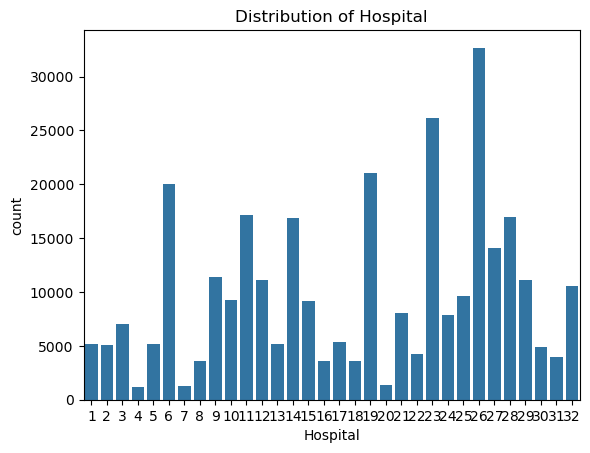

Hospital
1      5188
2      5050
3      7030
4      1216
5      5143
6     20016
7      1269
8      3611
9     11381
10     9271
11    17107
12    11149
13     5178
14    16917
15     9134
16     3631
17     5373
18     3592
19    21035
20     1390
21     8047
22     4237
23    26112
24     7835
25     9642
26    32681
27    14109
28    16947
29    11092
30     4917
31     3932
32    10561
dtype: int64


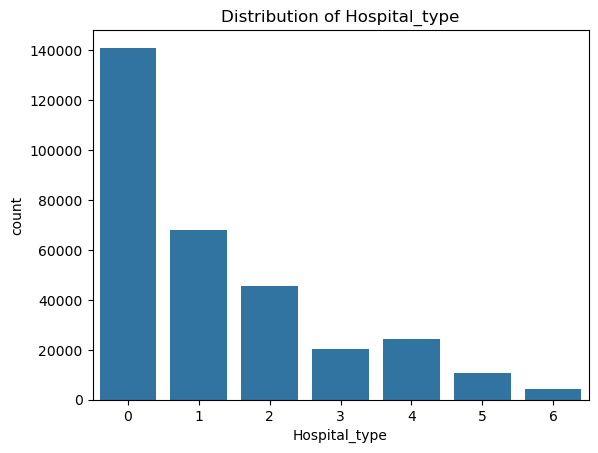

Hospital_type
0    141071
1     68125
2     45352
3     20161
4     24286
5     10561
6      4237
dtype: int64


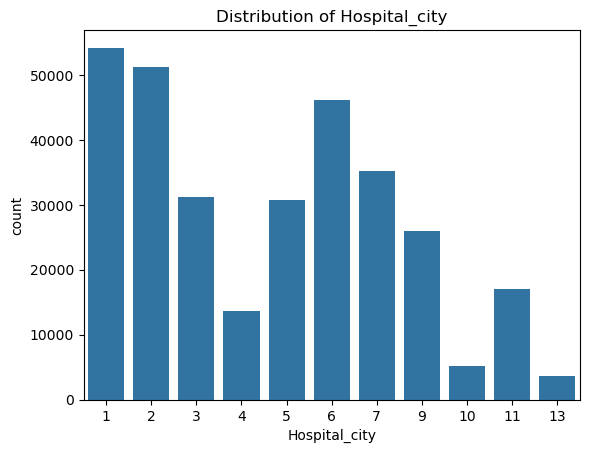

Hospital_city
1     54181
2     51178
3     31168
4     13577
5     30743
6     46128
7     35144
9     25947
10     5188
11    16947
13     3592
dtype: int64


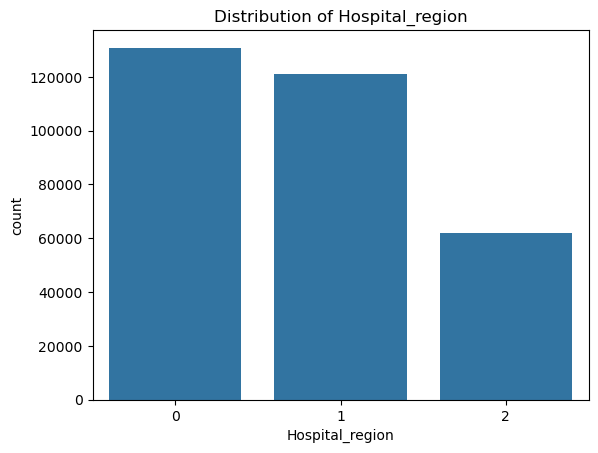

Hospital_region
0    130833
1    121049
2     61911
dtype: int64


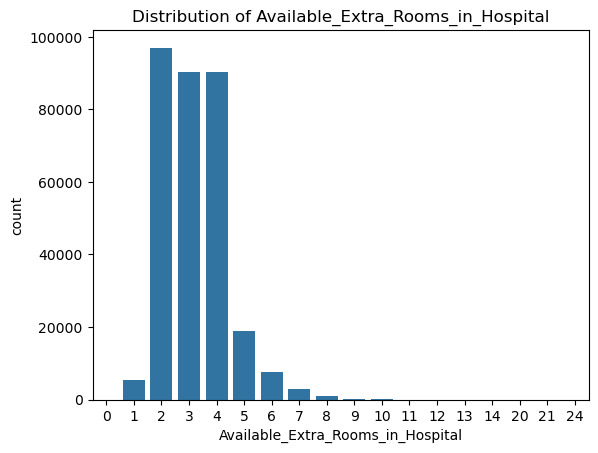

Available_Extra_Rooms_in_Hospital
0        15
1      5486
2     97017
3     90237
4     90279
5     18937
6      7649
7      2837
8      1017
9       217
10       63
11       17
12       13
13        2
14        1
20        2
21        3
24        1
dtype: int64


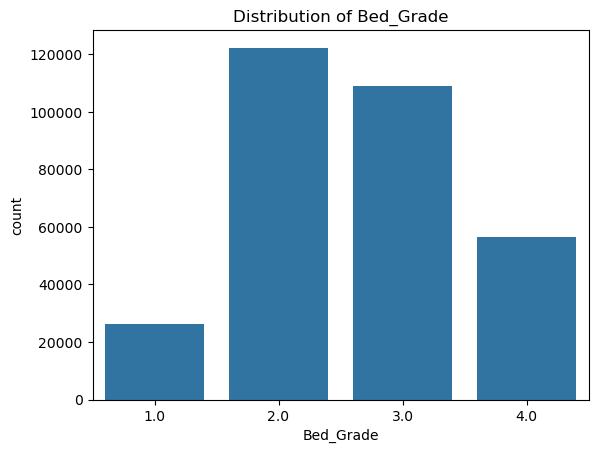

Bed_Grade
1.0     26212
2.0    122297
3.0    108878
4.0     56406
dtype: int64


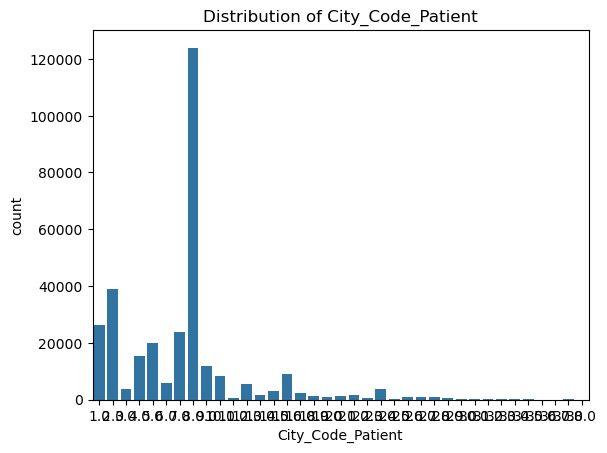

City_Code_Patient
1.0      26357
2.0      38835
3.0       3772
4.0      15379
5.0      20079
6.0       6005
7.0      23797
8.0     123977
9.0      11794
10.0      8172
11.0       658
12.0      5646
13.0      1625
14.0      2927
15.0      8943
16.0      2252
18.0      1404
19.0      1028
20.0      1409
21.0      1602
22.0       405
23.0      3697
24.0       360
25.0       798
26.0      1023
27.0       771
28.0       521
29.0        98
30.0       133
31.0        59
32.0        52
33.0        78
34.0        46
35.0        16
36.0        12
37.0        57
38.0         6
dtype: int64


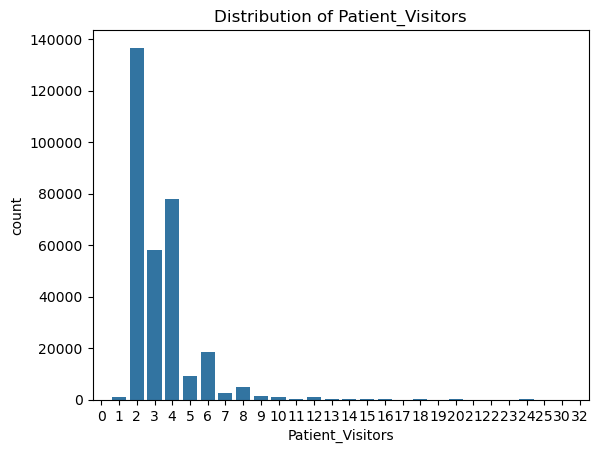

Patient_Visitors
0         18
1       1189
2     136680
3      58259
4      78044
5       9028
6      18510
7       2453
8       4775
9       1331
10      1168
11       318
12       949
13       102
14       202
15       187
16       281
17        20
18        60
19        12
20        59
21        11
22        19
23        10
24        78
25        12
30         9
32         9
dtype: int64


In [91]:
#gets all the necessary data that is either an int64 or float64 to be displayed in a countplot, which counts the frequency of each unique value in a column and plot it in a bar
for col in features.select_dtypes(include=['int64', 'float64']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()
    print(features.groupby([col]).size())
#using groupby + size to verify the number of rows of each group because some countplots are not too clear (due to value being too small to be placed in countplots)
#why don't use histogram or boxplot? Because the numeric values for all of these variables/features are acting as an id/code of the variable (e.g. Hospital Region 1 could be Asia, Hospital Region 2 could be Eurpoe, and vice versa)
#which is why we used countplot because it counts how many times the id/code appears to be displayed as a bar

Based on the countplots that shows the distribution of features, we can say that most patients are admitted to **hospital 26 (with 30k+)**, while the hospital with the least patients admitted is **hospitals 4 (way less than 5k)**. The type of hospitals patients are in are mostly **type 0 (slightly more than 140k)**, while the least being **type 6 (way fewer than 20k)**. Additionally, **hospital city 1** has the most patients admitted in that city **(50k+)**, with hospital city 8 and 12 not having any appearance in the dataset at all in the countplot, hence **hospital city 13** has the least patient admissions **(less than 10k)**. **Hospital region 0 is the most populated (120k+)** while **hospital region 2** is the least populated with patients **(around 60k)**. To add on, **hospitals 14 and 24** both only have **1 available extra room** each (based on the groupby size), while **most hospitals (closing to 100k) have only 2 extra rooms**. Furthermore, most bed grades are labelled as **2 (slightly more than 120k)**, while the **least bed grade is 1 (more than 20k)**. The city code of the patient is commonly **8 (with 120k+)** while the **least common is 38 (based on the groupby size)**. Lastly, the number of a patient's visitor is commonly to be **2 (130k+), 3 (close to 60k), and 4 (almost 80k)** while the least common number of patient visitors are **0 and 11 all the way to 39 visitors (with each being less than 500 times a patient has that number of visitors)**.

Note: Some countplots are rather hard to find the least common values due to how big our dataset is, hence I need to use groupby size to pinpoint smaller occurences. This could mean my model may recognize patterns for more common values easily but have a hard time finding less common values, which could cause the model to be less accurate. Hence I will be balancing available extra rooms column to hopefully increase the accuracy of the model.

In [92]:
#function to group the available extra rooms, this means that this will now be a categorical feature since we grouping values together
def combine_extra_rooms(value):
    if value in [0, 1, 2]:
        return '0-2 rooms'
    elif value == 3:
        return '3 rooms'
    elif value == 4:
        return '4 rooms'
    else:
        return '5 or more rooms'

# Apply to your dataframe
features['Available_Extra_Rooms_in_Hospital'] = features['Available_Extra_Rooms_in_Hospital'].apply(combine_extra_rooms)

#function to group the visitors, this means that this will now be a categorical feature since we grouping values together
def combine_visitors(value):
    if value in [0, 1, 2]:
        return '0-2 visitors'
    elif value == 3:
        return '3 visitors'
    elif value == 4:
        return '4 visitors'
    else:
        return '5 or more visitors'

# Apply to your dataframe
features['Patient_Visitors'] = features['Patient_Visitors'].apply(combine_visitors)

In [93]:
features = features.drop(['City_Code_Patient'], axis=1)
features
#after looking at the city_code_patient columns, I realized that is a lot of values I would have to one-hot encoding, which could affect memory cause my dataset quite large and it causes curse of dimensionality

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,Type of Admission,Illness_Severity,Patient_Visitors,Age
0,8,2,3,2,3 rooms,radiotherapy,R,F,2.0,Emergency,Extreme,0-2 visitors,51-60
1,2,2,5,2,0-2 rooms,radiotherapy,S,F,2.0,Trauma,Extreme,0-2 visitors,51-60
2,10,4,1,0,0-2 rooms,anesthesia,S,E,2.0,Trauma,Extreme,0-2 visitors,51-60
3,26,1,2,1,0-2 rooms,radiotherapy,R,D,2.0,Trauma,Extreme,0-2 visitors,51-60
4,26,1,2,1,0-2 rooms,radiotherapy,S,D,2.0,Trauma,Extreme,0-2 visitors,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,0,6,0,3 rooms,radiotherapy,Q,F,4.0,Emergency,Moderate,3 visitors,41-50
318434,24,0,1,0,0-2 rooms,anesthesia,Q,E,4.0,Urgent,Moderate,4 visitors,81-90
318435,7,0,4,0,3 rooms,gynecology,R,F,4.0,Emergency,Minor,3 visitors,71-80
318436,11,1,2,1,3 rooms,anesthesia,Q,D,3.0,Trauma,Minor,5 or more visitors,11-20


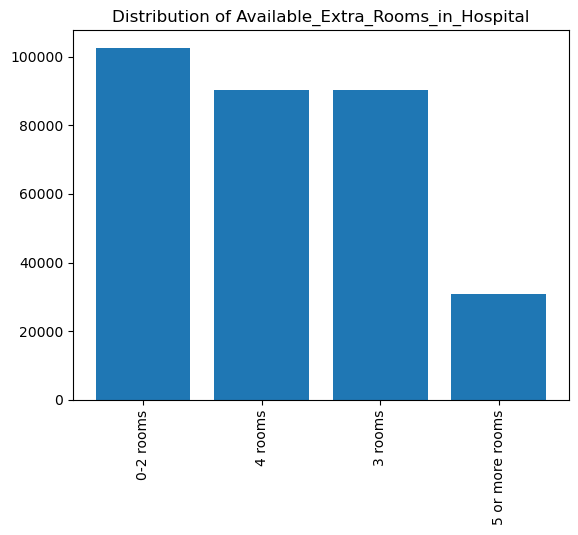

Available_Extra_Rooms_in_Hospital
0-2 rooms          102518
3 rooms             90237
4 rooms             90279
5 or more rooms     30759
dtype: int64


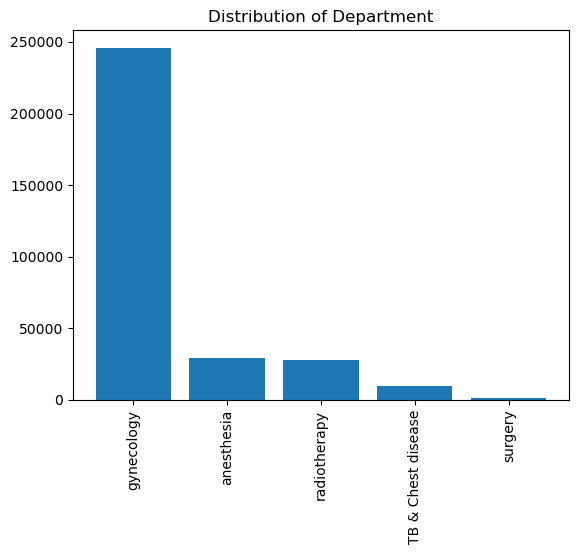

Department
TB & Chest disease      9460
anesthesia             29187
gynecology            245850
radiotherapy           28153
surgery                 1143
dtype: int64


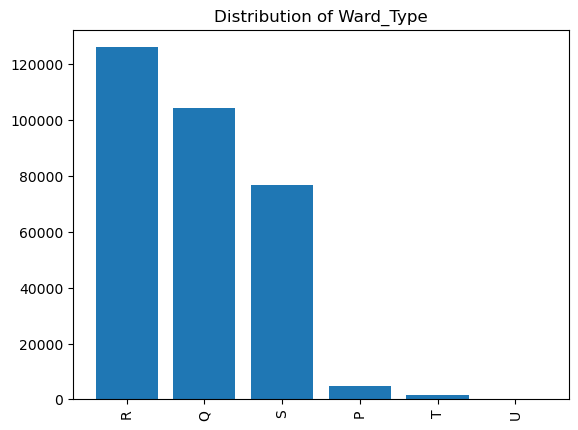

Ward_Type
P      4949
Q    104495
R    126104
S     76771
T      1465
U         9
dtype: int64


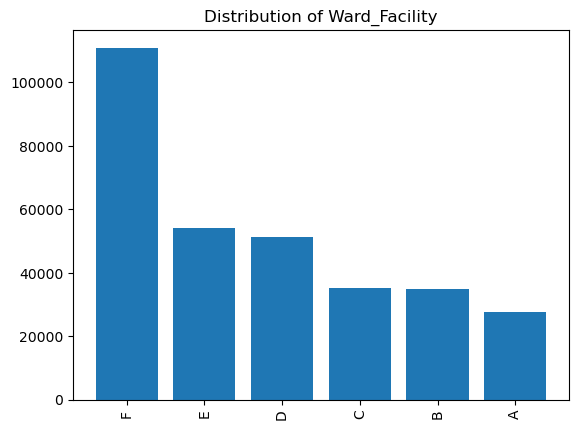

Ward_Facility
A     27557
B     34727
C     35144
D     51178
E     54181
F    111006
dtype: int64


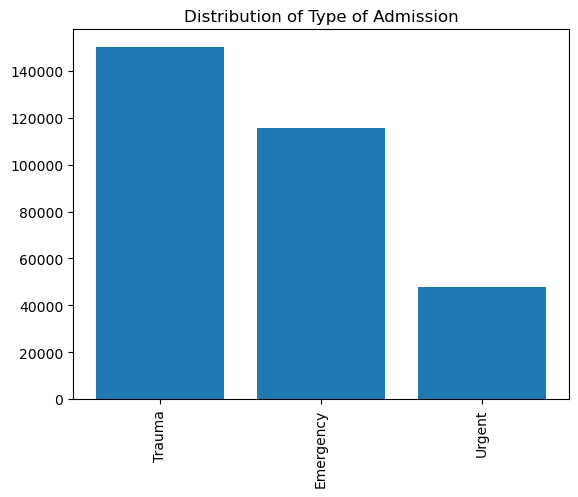

Type of Admission
Emergency    115564
Trauma       150252
Urgent        47977
dtype: int64


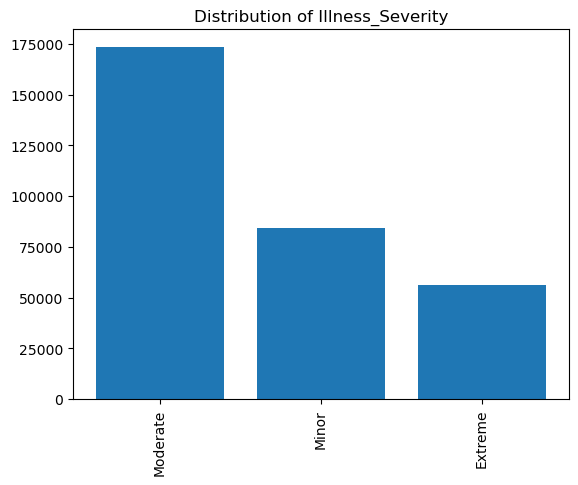

Illness_Severity
Extreme      56049
Minor        84319
Moderate    173425
dtype: int64


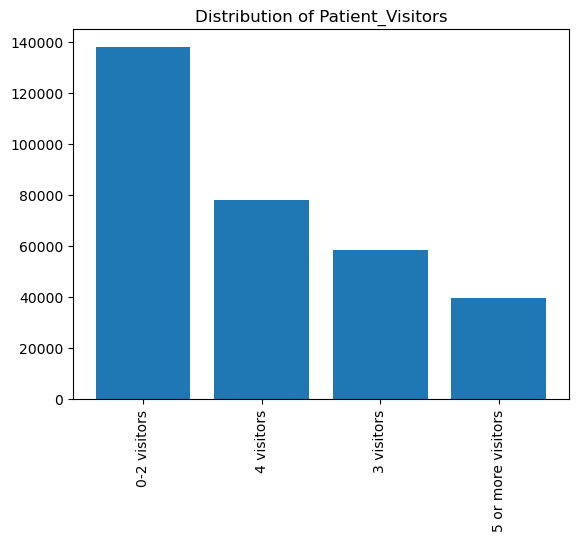

Patient_Visitors
0-2 visitors          137887
3 visitors             58259
4 visitors             78044
5 or more visitors     39603
dtype: int64


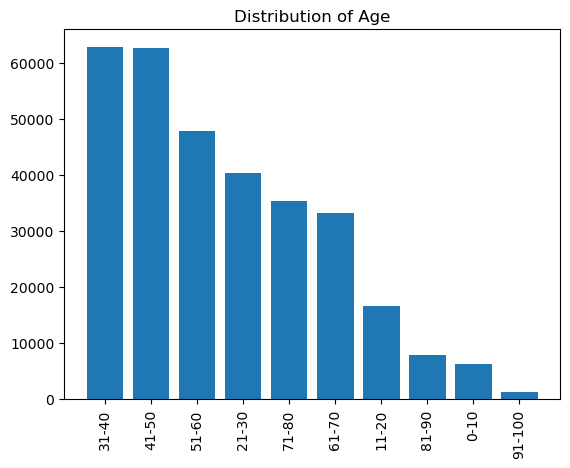

Age
0-10       6190
11-20     16537
21-30     40272
31-40     62760
41-50     62633
51-60     47766
61-70     33238
71-80     35354
81-90      7774
91-100     1269
dtype: int64


In [94]:
for col in features.select_dtypes(include=['object']).columns:
    cat_features = features[col]
    get_cat_f = cat_features.value_counts() #get occurences of each unique value in all categorical columns
    plt.xticks(rotation=90) #rotate labels for readability
    plt.bar(get_cat_f.index, get_cat_f.values)
    plt.title(f'Distribution of {col}')
    plt.show()
    #using groupby size to see smaller occurences such as Ward_Type U, surgery department
    print(features.groupby([col]).size())

(Used data from the bar graph + groupby size)
- The distribution for the available extra rooms in hospital is looking way more balanced after grouping. Hospitals with 0-2 available extra rooms having the most occurence at 100k+ while the least occurence being hospitals with 5 or more rooms (ranging around 30k+).
- The distribution of departments from the bar graph shows that the gynecology department has most of its patients overseen by them (close to 250k), while surgery has the least number of patients under its department (roughly 1k+).
- Ward Type U has the least occurence for the ward type (9 only) while Ward Type R is the most common ward type for patients (120k+).
- Ward Facility F is the most common for patients (with 100k+), while Ward Facility A is the least common (close to 30k).
- The type of admission that is the highest is Trauma (more than 140k+), while Urgent admissions have the least at around 40k+.
- For Illness Severity, most patients admitted have moderate severity (at almost 175k), however only about roughly 50k+ patients have extreme severity.
- The distribution of age shows that most patients are aged 31-40 & 41-50 (both having a total of 62k+ patients respectively with that age), while patients aged 91-100 is the least common (less than 1k).
- Just like the available extra rooms, the distribution of the patient visitors are way more even after regrouping the categories by adjusting less common categories into a category somewhat more common (meaning it isn't the most frequent occurence). The most common category for patient visitors is 0-2 patient visitors (with more than 130k+), while the less common number of patient visitors is 5 or more (with almost up to 40k+).

Based on this data, this could indicate that the model could overfit to the majority classes and ignore extremely rare categories (such as Ward Types have low common values, surgery deepartment having 1k+, and patients' age that are 91-100 being less than 1k).

Thus, I will be balancing the data by grouping less common categories together with rather more common categories. (but not the most common) to hopefully increase the model's accuracy.

In [95]:
#goal of this, to balance the data by grouping less common categories together with one another, or with a category that is populated but not the highest common value

#function to group the departments
def combine_departments(value):
    if value in ['TB & Chest disease', 'surgery']:
        return 'TB & Chest disease + surgery'
    else:
        return value

# Apply to your dataframe
features['Department'] = features['Department'].apply(combine_departments)

#function to group the ward type
def combine_ward_type(value):
    if value in ['P', 'T', 'U']:
        return 'Other Ward Types (P, T, U)'
    else:
        return value

# Apply to your dataframe
features['Ward_Type'] = features['Ward_Type'].apply(combine_ward_type)

#function to group the age
def combine_age(value):
    if value in ['0-10', '11-20']:
        return '0-20'
    elif value in ['81-90', '91-100']:
        return '81-100'
    else:
        return value

# Apply to your dataframe
features['Age'] = features['Age'].apply(combine_age)

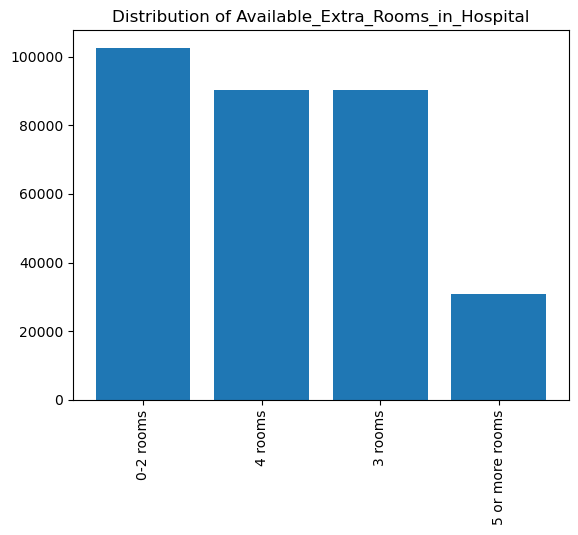

Available_Extra_Rooms_in_Hospital
0-2 rooms          102518
3 rooms             90237
4 rooms             90279
5 or more rooms     30759
dtype: int64


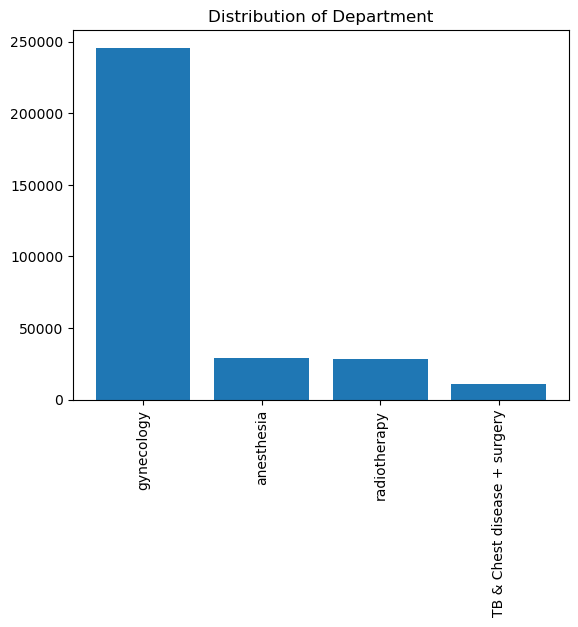

Department
TB & Chest disease + surgery     10603
anesthesia                       29187
gynecology                      245850
radiotherapy                     28153
dtype: int64


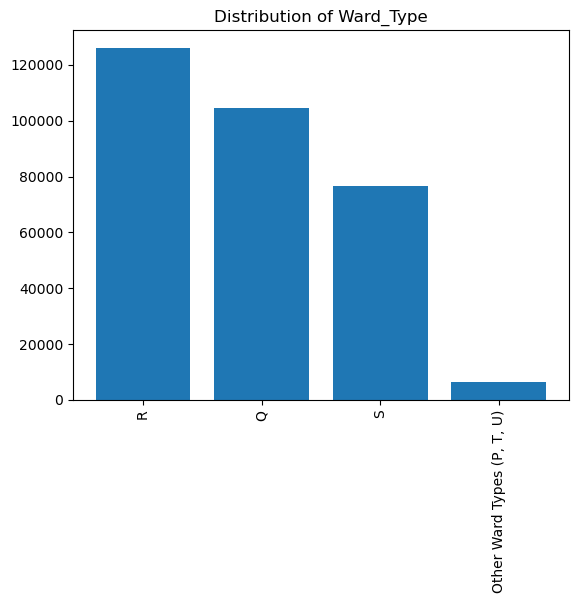

Ward_Type
Other Ward Types (P, T, U)      6423
Q                             104495
R                             126104
S                              76771
dtype: int64


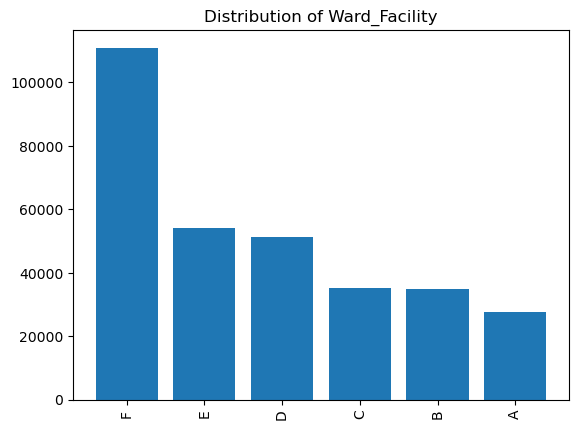

Ward_Facility
A     27557
B     34727
C     35144
D     51178
E     54181
F    111006
dtype: int64


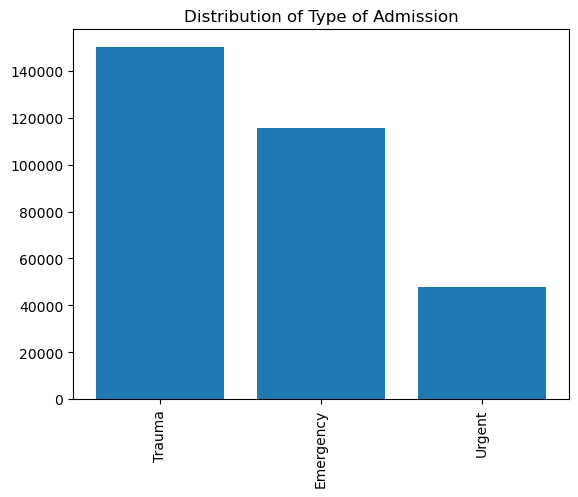

Type of Admission
Emergency    115564
Trauma       150252
Urgent        47977
dtype: int64


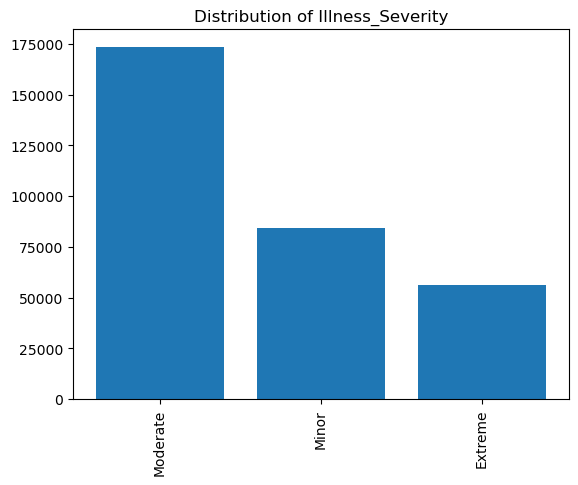

Illness_Severity
Extreme      56049
Minor        84319
Moderate    173425
dtype: int64


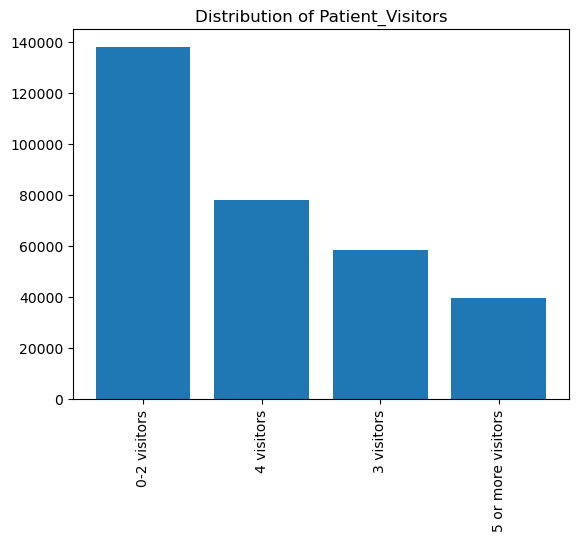

Patient_Visitors
0-2 visitors          137887
3 visitors             58259
4 visitors             78044
5 or more visitors     39603
dtype: int64


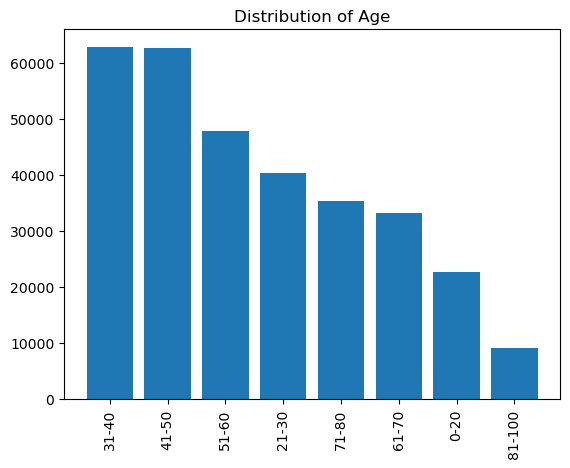

Age
0-20      22727
21-30     40272
31-40     62760
41-50     62633
51-60     47766
61-70     33238
71-80     35354
81-100     9043
dtype: int64


In [96]:
#for new grouped categories
for col in features.select_dtypes(include=['object']).columns:
    cat_features = features[col]
    get_cat_f = cat_features.value_counts() #get occurences of each unique value in all categorical columns
    plt.xticks(rotation=90) #rotate labels for readability
    plt.bar(get_cat_f.index, get_cat_f.values)
    plt.title(f'Distribution of {col}')
    plt.show()
    #using groupby size to see smaller occurences such as Ward_Type U, surgery department
    print(features.groupby([col]).size())
#yay! now our data looks more distributed and balanced :)

### 2.3.2 Understanding relationship between features

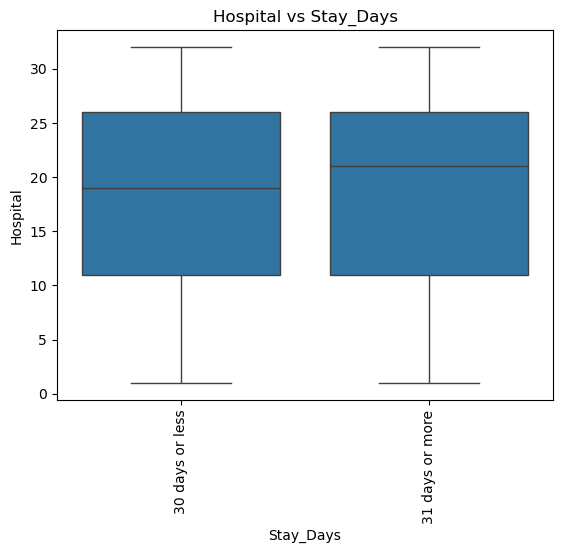

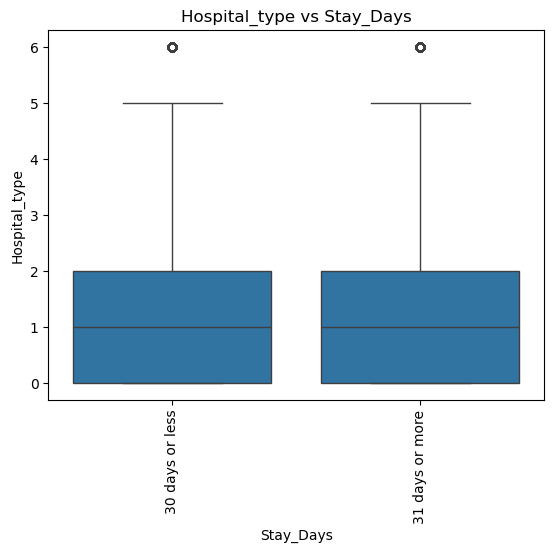

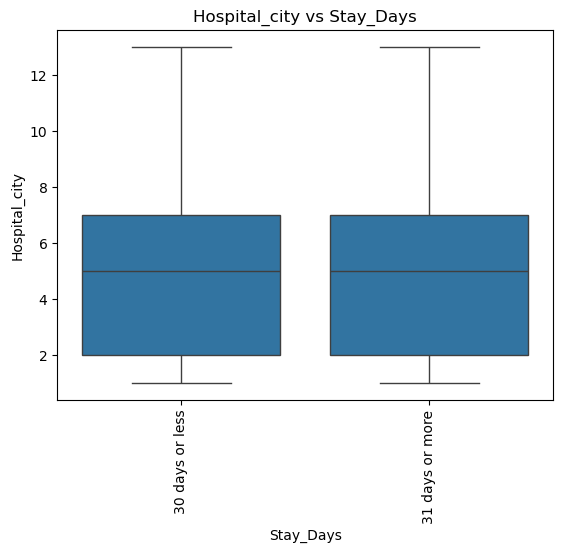

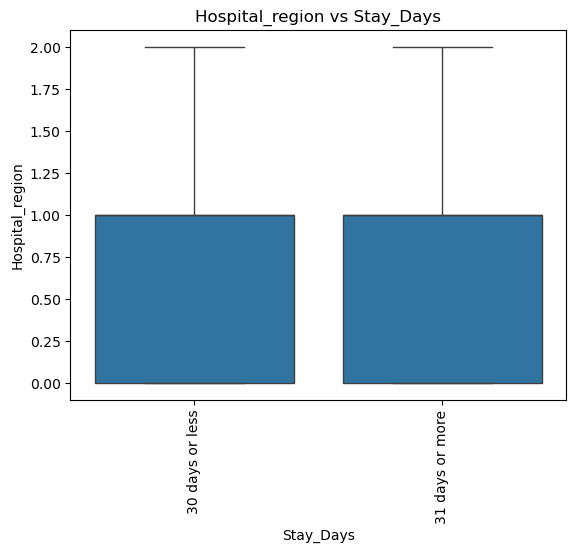

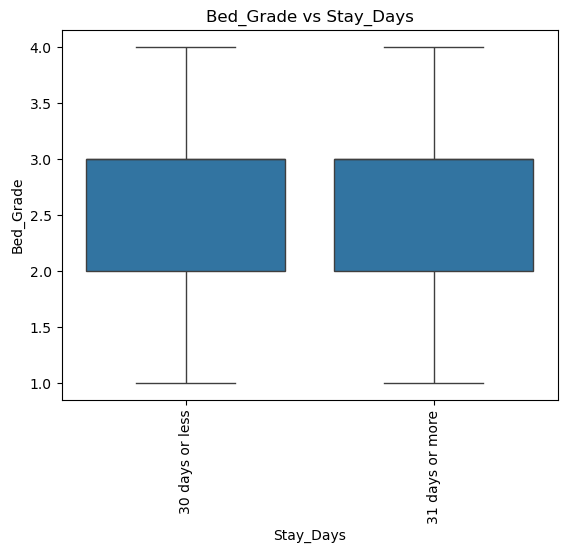

In [97]:
for col in features.select_dtypes(include=['int64', 'float64']).columns:
    sns.boxplot(x='Stay_Days', y=col, data=df)
    plt.title(f"{col} vs Stay_Days")
    plt.xticks(rotation=90)
    plt.show()
#for numerical variables vs stay days

We use boxplot for getting the relationship of all numeric variables. For the hospital, hospital type, hospital city, hospital region, and bed grade, not much outliers or anomalies are present, along with uniform range as all these variables are more categorical and should be explored with other tools rather than boxplots.

In [98]:
features['Hospital'] = features['Hospital'].astype('category')
features['Hospital_type'] = features['Hospital_type'].astype('category')
features['Hospital_city'] = features['Hospital_city'].astype('category')
features['Hospital_region'] = features['Hospital_region'].astype('category')
features['Bed_Grade'] = features['Bed_Grade'].astype('category')
# since we know that these variables are more categorical, we make sure during plotting, these are treated as categorical instead of numeric values

Hospital Heatmap


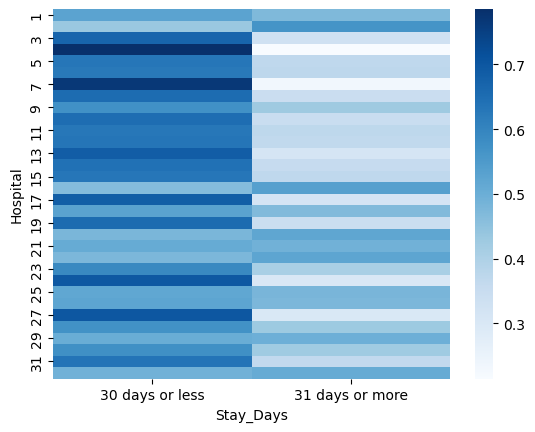

Hospital_type Heatmap


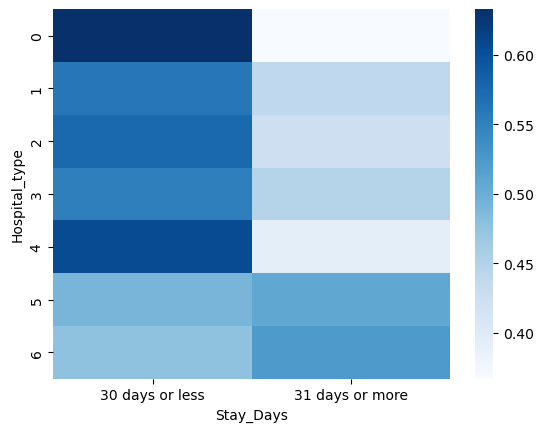

Hospital_city Heatmap


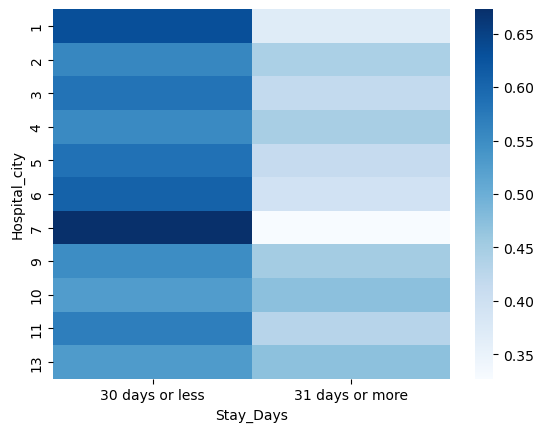

Hospital_region Heatmap


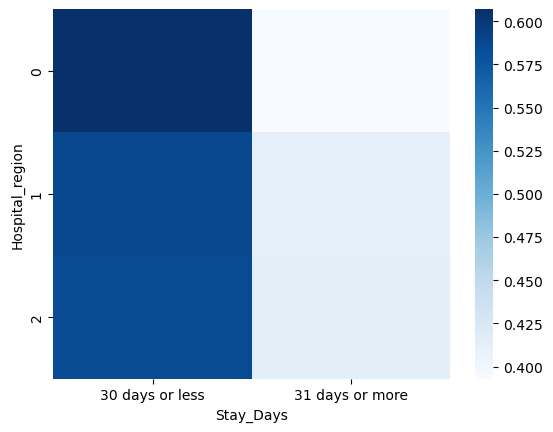

Available_Extra_Rooms_in_Hospital Heatmap


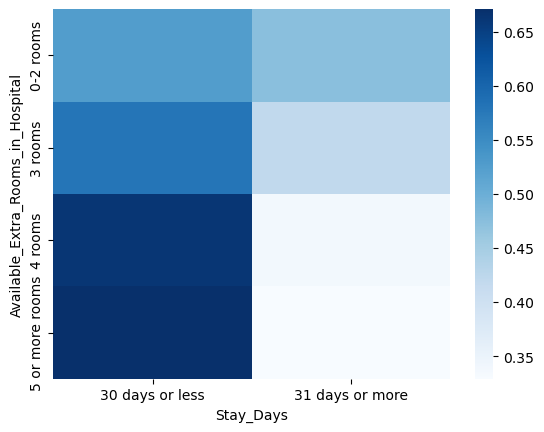

Department Heatmap


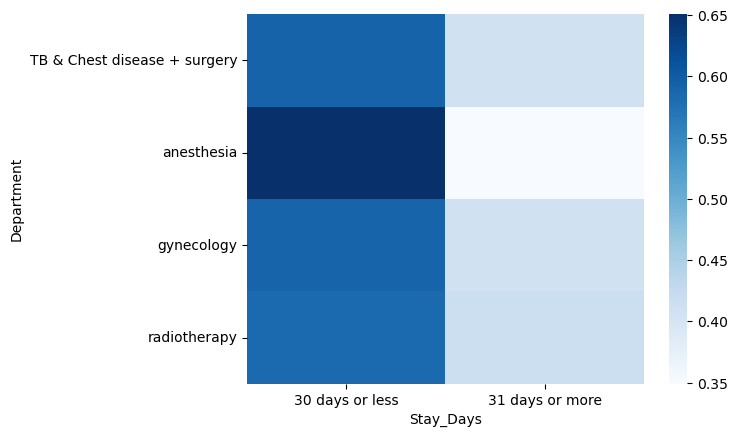

Ward_Type Heatmap


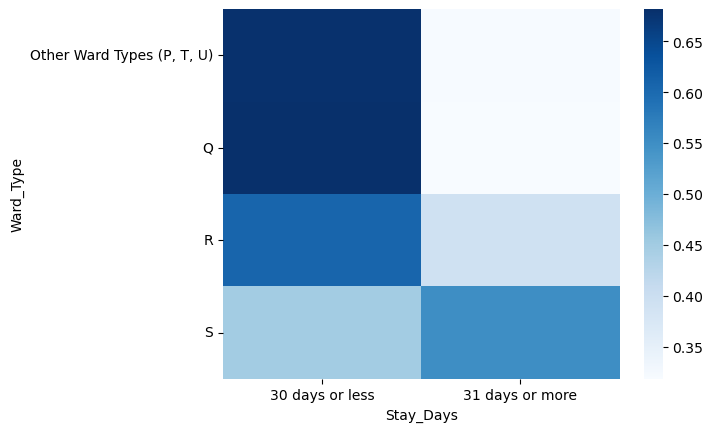

Ward_Facility Heatmap


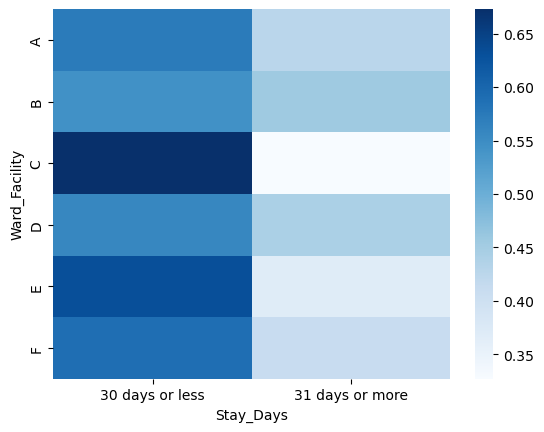

Bed_Grade Heatmap


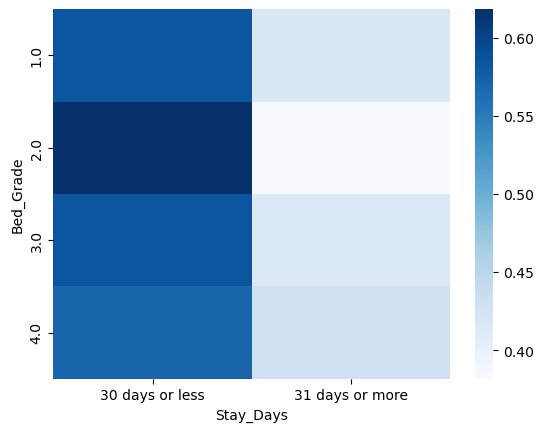

Type of Admission Heatmap


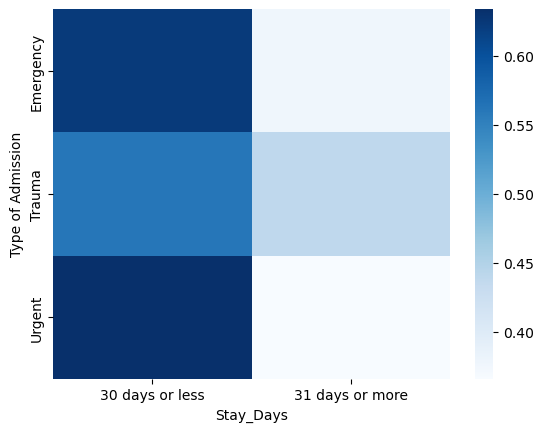

Illness_Severity Heatmap


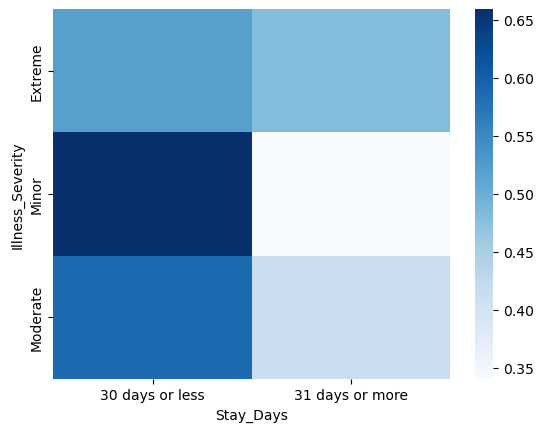

Patient_Visitors Heatmap


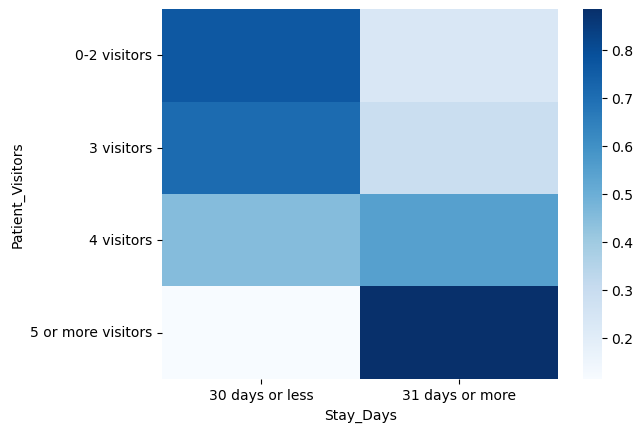

Age Heatmap


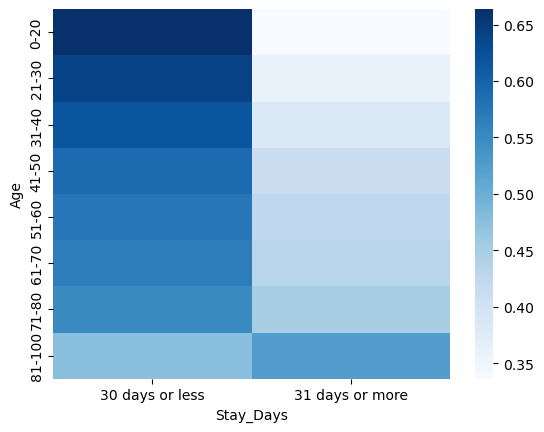

In [99]:
for col in features.select_dtypes(include=['object', 'category']).columns:
    print(f'{col} Heatmap')
    sns.heatmap(pd.crosstab(features[col], df['Stay_Days'], normalize='index'), cmap='Blues')
    plt.show()
    #heatmap comparsion for all categorical features vs stay days

All features vs Stay Days summary:

- Hospital vs Stay_Days: Moderate relationship because even though most hospitals show a higher proportion in the stay days of 30 days or less, overlapping still exists.
- Hospital_Type vs Stay_Days: Type 0 - 4 are more prone to having stay days of 30 days or lesser, while Type 5 - 6 spread more evenly, giving a moderate relationship because there is not a sharp separation of the target vs hospital type.
- Hospital_City vs Stay_Days: Weak relationship with Stay Days because it roughly looks uniform, with only hospital city 7 peaking for 30 days or less.
- Hospital_Region vs Stay_Days: Weak relationship as well similar to Hospital_City due to the obvious uniform proportions between 30 days or less or 31 days or more.
- Available_Extra_Rooms_in_Hospital vs Stay_Days: Weak relationship because most available extra rooms leans towards 30 days or less, showing not much difference.
- Department vs Stay_Days: Moderate relationship because even though anesthesia is highly tied to 30 days or less, other departments are looking quite uniform.
- Ward Type vs Stay Days: Moderate-strong relationship because Type Q and P, T, U are definitely leaning towards 30 days or less, while other types are more balanced which is why it is not as strong.
- Ward Facility vs Stay Days: Demostrates roughly similar distribution across the days of stay, with only facility C peaking in 30 days or less, hence providing a weak relationship.
- Bed Grade vs Stay Days: Bed Grade 2 is heavily tied to 30 days or less. Others grades are less distinct and show similarities with each other which shows a weak-moderate relationship.
- Type of Admission vs Stay Days: Moderate-strong relationship because emergency and urgent are very tied to 30 days or less, while trauma is rather more balanced but still more tied to 30 days or less. Clear tilt but still not absolute.
- Illness Severity vs Stay Days: Moderate-strong relationship due to minor being often to shorter stays (30 days or less), while extreme and moderate are more spread to longer stay days (although moderate is more prone to 30 days or less), which shows more distinct values.
- Patient_Visitors vs Stay_Days: Moderate-strong relationship because more visitors (5 or more) tend to indicate longer stays. While having less than or 3 visitors tend to imply shorter stays. It isn't a hugely strong relationship because the trend isn't perfect (due to 4 visitors being quite balanced in the stay days), however it is still indeed a strong feature for prediction.
- Age vs Stay Days: Strong relationship because there is a trend that shows us that younger people tend to stay for shorter periods while older people tend to stay for longer periods.

Note: Overlapping = Different categories of a feature share similar distributions of Stay Days.

Based on the heat map that is useful to show the relationship between the stay days and features, we can say that one common similarity of most of the categorical features is that it highly affects the stay duration of 30 days or less due to the more darker shades of blue detected throughout all the heatmaps in the 30 days or less columns.

Since we now have a better understanding of the relationship, we know that hospital region, hospital city, ward facility, and available extra rooms in hospital should not be drivers of the model's predictions as they do not show a trend due to similarities between the distribtution based on the heatmap. However, features such as illness severity, age, type of admission, patient visitors, and ward type should be considered as the main features for the model's interpretation because they do show possible trends to aid the model's prediction.

Hospital Heatmap


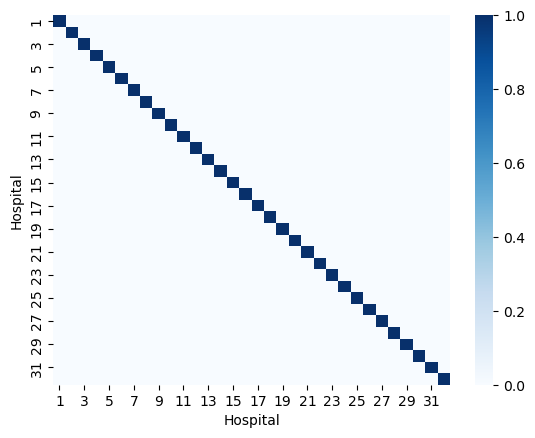

Hospital_type Heatmap


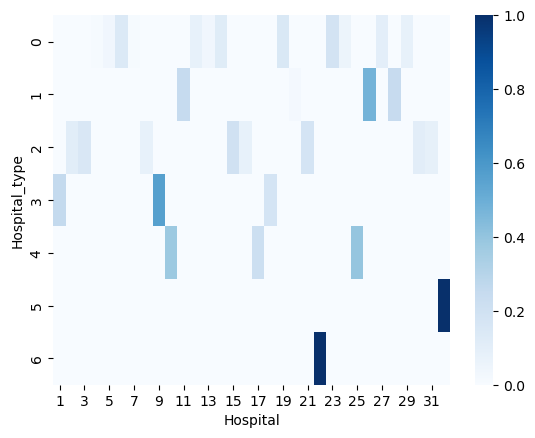

Hospital_city Heatmap


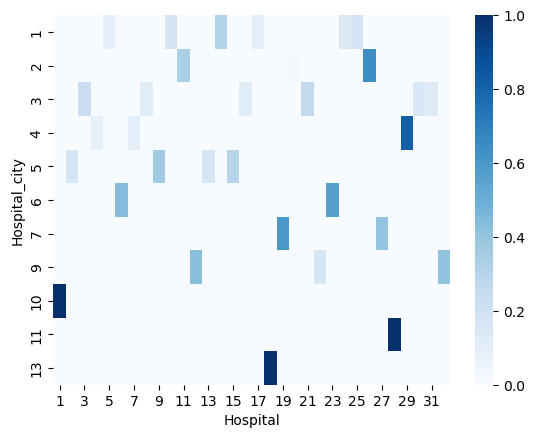

Hospital_region Heatmap


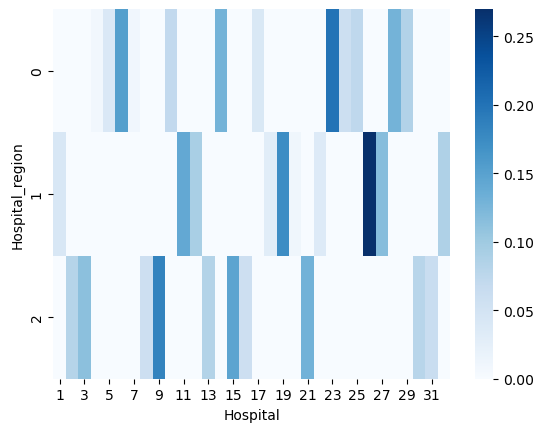

Available_Extra_Rooms_in_Hospital Heatmap


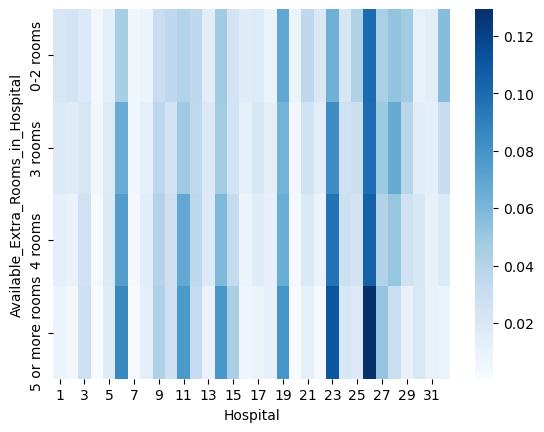

Department Heatmap


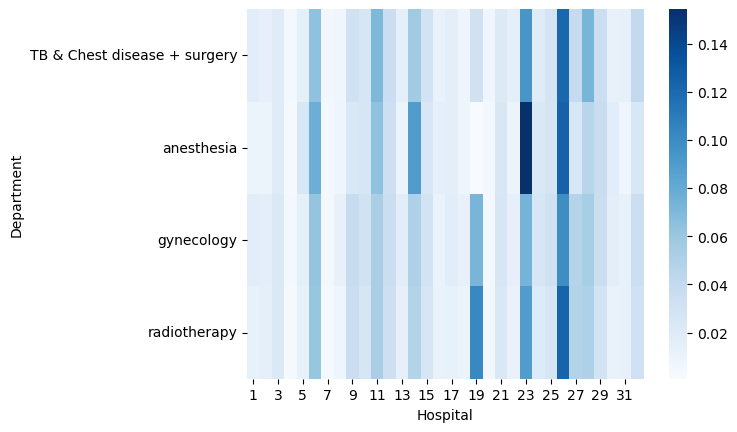

Ward_Type Heatmap


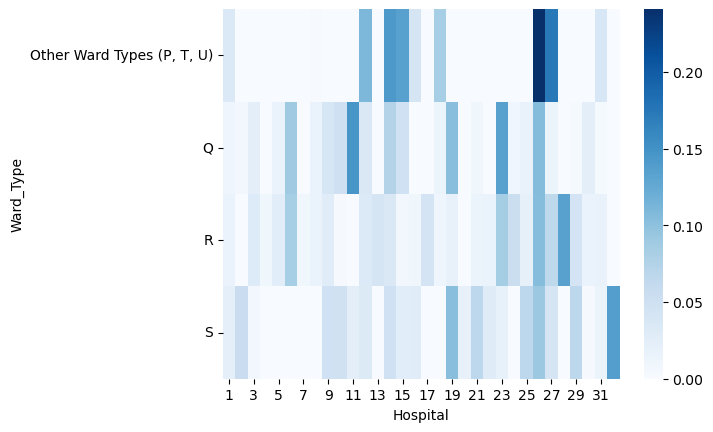

Ward_Facility Heatmap


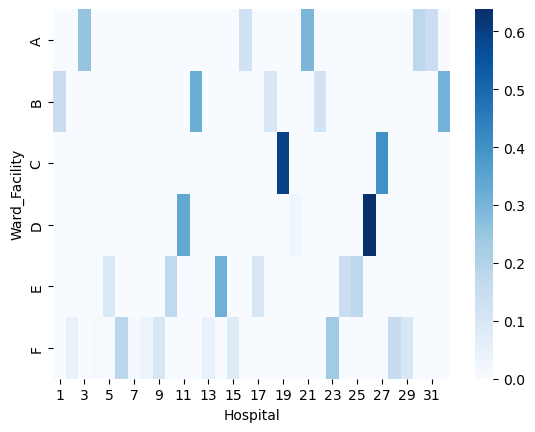

Bed_Grade Heatmap


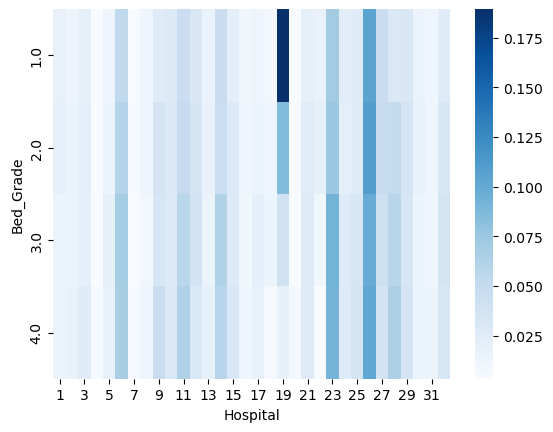

Type of Admission Heatmap


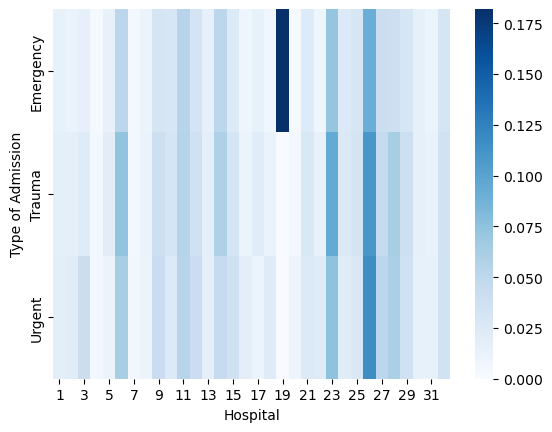

Illness_Severity Heatmap


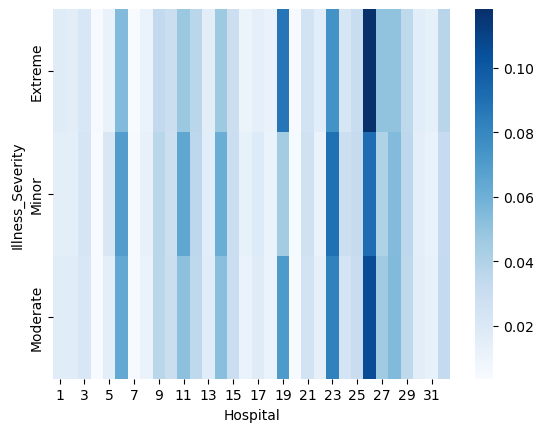

Patient_Visitors Heatmap


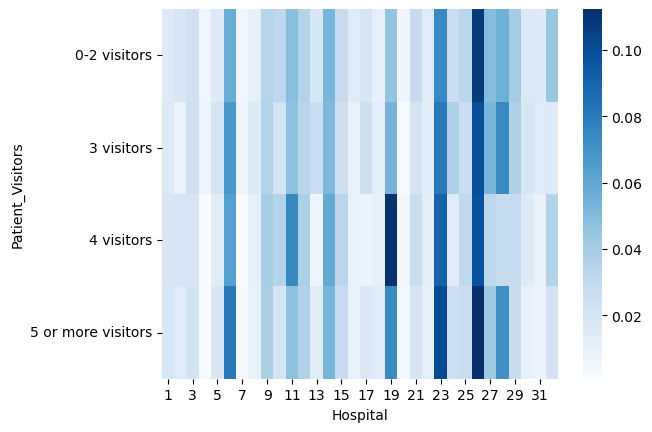

Age Heatmap


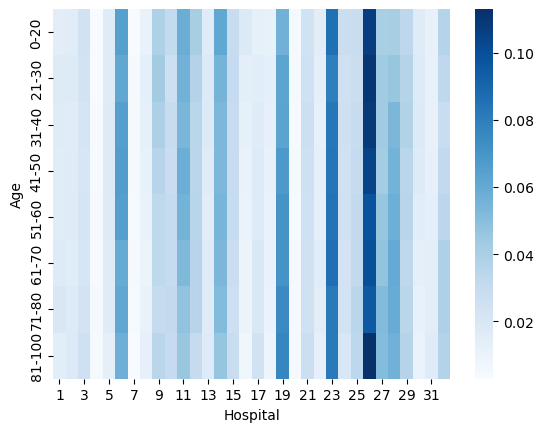

In [100]:
for col in features.select_dtypes(include=['object', 'category']).columns:
    print(f'{col} Heatmap')
    sns.heatmap(pd.crosstab(features[col], df['Hospital'], normalize='index'), cmap='Blues')
    plt.show()
    #heatmap comparsion for all categorical features vs Hospital
    #comparing with Hospital variable because this is where most features are tied back to

Based on the heatmap that compares the feature, Hospital, vs all categorical feature, for hospital type, hospital city, hospital region, and ward facility each hospital are grouped accordingly based on their type, city, region, and facility with no overlapping which shows that these features are heavily reliant on the feature, Hospital.
For all the other features, there are some moderately strong relationships with the hospital (with only age having a weak relationship with Hospital while available extra rooms having a moderate relationship with Hospital):
- Available_Extra_Rooms_in_Hospital: Shows some hospitals are more prone to have 4 or more rooms, while others vice versa. However there is still some similarities in the distribution of available extra rooms in hospitals.
- Department vs Hospital: Shows that hospitals vary in department usage, some heavily focus on anesthesia (especially hospital 23), others focus more on radiotherapy etc., with hospital 26 being very specialized in TB & Chest disease + surgery, anesthesia & radiotherapy.
- Ward Type vs Hospital: Shows that different hospitals use different wards types more often (with hospital 26 using other wards types P, T & U more).
- Bed Grade vs Hospital: Shows that some hospitals lean towards different bed grade (with hospital 19 preferring bed grade 1 the most).
- Type of Admission vs Hospital: Shows that admission types do vary across different hospital (with hospital 19 again leaning towards emergency the most frequently).
- Illness Severity vs Hospital: Implies again different hospital = cater towards different illnesses, although there isn't a huge drastic notice in which hospital caters to which illness more.
- Patient Visitors vs Hospital: Although not the perfect relationship (due to some overlapping present still), there are still signs that show a higher proportion of patients having more visitors.
- Age vs Hospital: Patients are rather fairly distributed across different hospitals.

There is a risk of redundancy for the model when adding hospital type, city, region, and ward facility because they are most likely nested features under Hospital. However, I will be still adding these features for interpretability purposes and they might still help the model to capture possible predictions that have differences in the region, type, ward facility, and city of the hospital.

# 3. Data Preparation

## 3.1 One-Hot Encoding

In [101]:
## Split data into train set and test set
## Note we don't really have to clean our data further since we checked for feature importance + missing values previously
## Now we just have to one-hot encode the categorical data to prepare for training
## We don't have to worry too much about the performance of the model due to one-hot encoding because our data has quite a large sum of rows
## We would want to encode both our new engineered features + old features for a comparison to show that our feature engineering has improved the model's prediction
features_encoded = pd.get_dummies(features, drop_first=True)
old_features = pd.get_dummies(old_features, drop_first=True)
features_encoded

,Hospital_2,Hospital_3,Hospital_4,Hospital_5,Hospital_6,Hospital_7,Hospital_8,Hospital_9,Hospital_10,Hospital_11,...,Patient_Visitors_3 visitors,Patient_Visitors_4 visitors,Patient_Visitors_5 or more visitors,Age_21-30,Age_31-40,Age_41-50,Age_51-60,Age_61-70,Age_71-80,Age_81-100
0,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
318434,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
318435,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
318436,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


## 3.2 Train-Test Split

In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=2025)#train + test for the modified features
X_train_old, X_test_old, Y_train_old, Y_test_old = train_test_split(old_features, target, test_size=0.2, random_state=2025)#train + test for the original features
# we will set test size to be 20% because we have more than enough data for evaluation 

# 4. Modelling

### 4.2 Train Model

When we training the model, we want two different categories of models:
- Category 1: Model that has the original unfiltered features to be trained and tested.
- Category 2: Model that has all the features we have engineered when we were exploring EDA.

This will be useful to see if our features we have modified will aid our model's correct predictions using different algorithms.

In [103]:
## Initialise and train model (logr)
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()#for engineered features
logr_old = LogisticRegression()#for original features

logr.fit(X_train, Y_train)
logr_old.fit(X_train_old, Y_train_old)

c:\Users\User\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [104]:
## Initialise and train model (LDA)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()#for engineered features
lda_old = LinearDiscriminantAnalysis()#for original features

lda.fit(X_train, Y_train)
lda_old.fit(X_train_old, Y_train_old)

,solver,'svd'
,shrinkage,None
,priors,None
,n_components,None
,store_covariance,False
,tol,0.0001
,covariance_estimator,None


In [105]:
## Initialise and train model (Decision Tree)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()#for engineered features
dt_old = DecisionTreeClassifier()#for original features
dt.fit(X_train, Y_train)
dt_old.fit(X_train_old, Y_train_old)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [106]:
## Initialise and train model (Random Forest)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()#for engineered features
rf_old = RandomForestClassifier()#for original features

rf.fit(X_train, Y_train)
rf_old.fit(X_train_old, Y_train_old)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [107]:
## Initialise and train model (Gradient Boosting)
from sklearn.ensemble import GradientBoostingClassifier

gbt = GradientBoostingClassifier()#for engineered features
gbt_old = GradientBoostingClassifier()#for original features

gbt.fit(X_train, Y_train)
gbt_old.fit(X_train_old, Y_train_old)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


# 5. Model Evaluation

For the engineered features

In [108]:
## Evaluate the Model
## Make predictions on the test set using X_test for all the models
y_pred_logr = logr.predict(X_test)
y_pred_lda = lda.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbt = gbt.predict(X_test)
## Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print("Logistic Regression: ", accuracy_score(Y_test, y_pred_logr))
print("Linear Discriminant Analysis: ", accuracy_score(Y_test, y_pred_lda))
print("Decision Tree: ", accuracy_score(Y_test, y_pred_dt))
print("Random Forest: ", accuracy_score(Y_test, y_pred_rf))
print("Gradient Boosting: ", accuracy_score(Y_test, y_pred_gbt))

Logistic Regression:  0.7796172660494909
Linear Discriminant Analysis:  0.7794897942924521
Decision Tree:  0.7418856259659969
Random Forest:  0.7625360506062876
Gradient Boosting:  0.791822686785959


In [109]:
from sklearn.metrics import classification_report
print("Logistic Regression: ")
print(classification_report(Y_test, y_pred_logr))
print("Linear Discriminant Analysis: ")
print(classification_report(Y_test, y_pred_lda))

Logistic Regression: 
                 precision    recall  f1-score   support

30 days or less       0.77      0.91      0.83     37421
31 days or more       0.81      0.59      0.68     25338

       accuracy                           0.78     62759
      macro avg       0.79      0.75      0.76     62759
   weighted avg       0.78      0.78      0.77     62759

Linear Discriminant Analysis: 
                 precision    recall  f1-score   support

30 days or less       0.76      0.91      0.83     37421
31 days or more       0.82      0.58      0.68     25338

       accuracy                           0.78     62759
      macro avg       0.79      0.75      0.76     62759
   weighted avg       0.79      0.78      0.77     62759



In [110]:
print("Decision Tree: ")
print(classification_report(Y_test, y_pred_dt))
print("Random Forest: ")
print(classification_report(Y_test, y_pred_rf))
print("Gradient Boosting: ")
print(classification_report(Y_test, y_pred_gbt))

Decision Tree: 
                 precision    recall  f1-score   support

30 days or less       0.75      0.85      0.80     37421
31 days or more       0.72      0.59      0.65     25338

       accuracy                           0.74     62759
      macro avg       0.74      0.72      0.72     62759
   weighted avg       0.74      0.74      0.74     62759

Random Forest: 
                 precision    recall  f1-score   support

30 days or less       0.77      0.86      0.81     37421
31 days or more       0.75      0.62      0.68     25338

       accuracy                           0.76     62759
      macro avg       0.76      0.74      0.74     62759
   weighted avg       0.76      0.76      0.76     62759

Gradient Boosting: 
                 precision    recall  f1-score   support

30 days or less       0.76      0.94      0.84     37421
31 days or more       0.87      0.57      0.69     25338

       accuracy                           0.79     62759
      macro avg       0.82  

For the original features

In [111]:
## Evaluate the Model
## Make predictions on the test set using X_test_old for all the models
y_pred_logr_old = logr_old.predict(X_test_old)
y_pred_lda_old = lda_old.predict(X_test_old)
y_pred_dt_old = dt_old.predict(X_test_old)
y_pred_rf_old = rf_old.predict(X_test_old)
y_pred_gbt_old = gbt_old.predict(X_test_old)
## Calculate the accuracy of the model
from sklearn.metrics import accuracy_score
print("Logistic Regression: ", accuracy_score(Y_test_old, y_pred_logr_old))
print("Linear Discriminant Analysis: ", accuracy_score(Y_test_old, y_pred_lda_old))
print("Decision Tree: ", accuracy_score(Y_test_old, y_pred_dt_old))
print("Random Forest: ", accuracy_score(Y_test_old, y_pred_rf_old))
print("Gradient Boosting: ", accuracy_score(Y_test_old, y_pred_gbt_old))

Logistic Regression:  0.7775936519064994
Linear Discriminant Analysis:  0.7818639557673003
Decision Tree:  0.7202950971175449
Random Forest:  0.7654997689574403
Gradient Boosting:  0.7916314791504008


In [112]:
from sklearn.metrics import classification_report
print("Logistic Regression: ")
print(classification_report(Y_test_old, y_pred_logr_old))
print("Linear Discriminant Analysis: ")
print(classification_report(Y_test_old, y_pred_lda_old))

Logistic Regression: 
                 precision    recall  f1-score   support

30 days or less       0.77      0.90      0.83     37421
31 days or more       0.81      0.59      0.68     25338

       accuracy                           0.78     62759
      macro avg       0.79      0.75      0.76     62759
   weighted avg       0.78      0.78      0.77     62759

Linear Discriminant Analysis: 
                 precision    recall  f1-score   support

30 days or less       0.76      0.92      0.83     37421
31 days or more       0.83      0.58      0.68     25338

       accuracy                           0.78     62759
      macro avg       0.80      0.75      0.76     62759
   weighted avg       0.79      0.78      0.77     62759



In [113]:
print("Decision Tree: ")
print(classification_report(Y_test_old, y_pred_dt_old))
print("Random Forest: ")
print(classification_report(Y_test_old, y_pred_rf_old))
print("Gradient Boosting: ")
print(classification_report(Y_test_old, y_pred_gbt_old))

Decision Tree: 
                 precision    recall  f1-score   support

30 days or less       0.75      0.79      0.77     37421
31 days or more       0.66      0.62      0.64     25338

       accuracy                           0.72     62759
      macro avg       0.71      0.70      0.71     62759
   weighted avg       0.72      0.72      0.72     62759

Random Forest: 
                 precision    recall  f1-score   support

30 days or less       0.78      0.85      0.81     37421
31 days or more       0.75      0.64      0.69     25338

       accuracy                           0.77     62759
      macro avg       0.76      0.74      0.75     62759
   weighted avg       0.76      0.77      0.76     62759

Gradient Boosting: 
                 precision    recall  f1-score   support

30 days or less       0.76      0.94      0.84     37421
31 days or more       0.87      0.57      0.69     25338

       accuracy                           0.79     62759
      macro avg       0.82  

#### Breakdown of the metric scores

(We are using the classification report for the metric scores since we have a classification problem + our target is classified into 2 categories)

Logistic Regression:

| Metric Type | Before Feature Engineering | After Feature Engineering |
|-----|-----|-----|
| Accuracy Score | 0.7776 | 0.7796 |
| Recall Score (31 days or more) | 0.59 | 0.59 |
| Precision Score (31 days or more) | 0.81 | 0.81 |
| F1 Score (31 days more) | 0.68 | 0.68 |

Linear Discriminant Analysis:

| Metric Type | Before Feature Engineering | After Feature Engineering |
|-----|-----|-----|
| Accuracy Score | 0.7819 | 0.7795 |
| Recall Score (31 days or more) | 0.58 | 0.58 |
| Precision Score (31 days or more) | 0.83 | 0.82 |
| F1 Score (31 days or more) | 0.68 | 0.68 |

Decision Tree:

| Metric Type | Before Feature Engineering | After Feature Engineering |
|-----|-----|-----|
| Accuracy Score | 0.7202 | 0.7416 |
| Recall Score (31 days or more) | 0.62 | 0.59 |
| Precision Score (31 days or more) | 0.66 | 0.72 |
| F1 Score (31 days or more) | 0.64 | 0.65 |

Random Forest:

| Metric Type | Before Feature Engineering | After Feature Engineering |
|-----|-----|-----|
| Accuracy Score (31 days or more) | 0.7660 | 0.7620 |
| Recall Score (31 days or more) | 0.64 | 0.62 |
| Precision Score (31 days or more) | 0.75 | 0.75 |
| F1 Score (31 days or more) | 0.69 | 0.68 |

Gradient Boosting:

| Metric Type | Before Feature Engineering | After Feature Engineering |
|-----|-----|-----|
| Accuracy Score | 0.7916 | 0.7918 |
| Recall Score (31 days or more) | 0.57 | 0.57 |
| Precision Score (31 days or more) | 0.87 | 0.87 |
| F1 Score (31 days or more) | 0.69 | 0.69 |

Based on the statistics from the classification report:
- Feature engineering only boosted Decision Tree overall accuracy. This is because tree-based models are more sensitive to feature noise and irrelevant variables, for the decision tree to have clearer and more meaningful splits. This shows that feature engineering did help the model to be slightly more accurate (even though there is no improvement in the other models except for Decision Tree as the others still remain constant).
- We will be using **Gradient Boosting** as our main model for prediction with the features engineered as it has the highest accuracy and F1 Score. We will also be using the **F1 Score** as our main metric score because both short (30 days or less) and long (31 day or more) are important for optimal resource allocation and better functioning for hospitals (goal of the model's predictions).

### HyperParameter Tuning

In [114]:
from sklearn.model_selection import RandomizedSearchCV

#reason why n_estimators and learning_rate was chosen as the hyperparameters:
# - n_estimators provides the number of trees needed for a model to have a good fit
# - learning_rate shrinks the contribution of each tree (smaller value = trees contribute less, but require more trees, larger value = faster learning, but fewer trees needed, however risk overfitting)
#   hence learning_rate plays a key factor in affecting n_estimators, so it is important get the best hyperparameter for these two!

param_dist = {
    'n_estimators': [100,200],
    'learning_rate': [0.01, 0.05, 0.1]
}
#the hyperparameters we want to tune, list them down here
#note we are only going to tune this much cause I am rather worried about the time complexity of the tuning

random_search = RandomizedSearchCV(
    estimator=gbt,#the model type
    param_distributions=param_dist,#parameters
    n_iter=6,#since n_estimators has 2 possible combos, and learning rate got 3 possible combos = 2 * 3 = 6 possible combos
    scoring='f1',
    cv=3,#validate with 3 fold-cross validation, only 3 cv for efficiency + our dataset is quite big, so essentially 1 fold should have enough data for training and validation
    n_jobs=-1,
    random_state=2025
)
#do Randomized Search CV by randomizing the combinations we give

random_search.fit(X_train, Y_train)
#train the model

print("Best parameters:", random_search.best_params_)
#then get the best parameters for the next training

c:\Users\User\anaconda3\envs\mldp\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(


Best parameters: {'n_estimators': 100, 'learning_rate': 0.01}


In [115]:
#tuning based on best parameters given
gbt = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.01
)

gbt.fit(X_train, Y_train)
final_Y_gbt = gbt.predict(X_test)
print("Gradient Boosting: ", accuracy_score(Y_test, final_Y_gbt))
print(classification_report(Y_test_old, final_Y_gbt))

Gradient Boosting:  0.7799678133813477
                 precision    recall  f1-score   support

30 days or less       0.75      0.95      0.84     37421
31 days or more       0.87      0.53      0.66     25338

       accuracy                           0.78     62759
      macro avg       0.81      0.74      0.75     62759
   weighted avg       0.80      0.78      0.77     62759



Gradient Boosting (with features engineered):

| Metric Type | Before HyperParameter Tuning  | After HyperParameter Tuning |
|-----|-----|-----|
| Accuracy Score | 0.79 | 0.78 |
| Recall Score (31 days or more) | 0.57 | 0.53 |
| Recall Score (30 days or less) | 0.94 | 0.95 |
| Precision Score (31 days or more) | 0.87 | 0.87 |
| Precision Score (30 days or less) | 0.76 | 0.75 |
| F1 Score (31 days or more) | 0.69 | 0.66 |
| F1 Score (30 days or less) | 0.84 | 0.84 |
| Marco Average (Precision) | 0.82 | 0.81 |
| Marco Average (Recall) | 0.76 | 0.74 |
| Marco Average (F1 Score) | 0.77 | 0.75 |
| Weighted Average (Precision) | 0.81 | 0.80 |
| Weighted Average (Recall) | 0.79 | 0.78 |
| Weighted Average (F1 Score) | 0.78 | 0.77 |

Before tuning for Gradient Boosting, it scored an accuracy of 0.79 and a F1 Score of 0.69 for 31 days or more stay days category. After hyperparameter tuning the n_estimators and learning rate, the accuracy decreased to 0.78, while the F1 Score for stay days of 31 days or more has dropped by 0.66, which implies a weaker balance between precision and recall for the minority class (31 days or more). In addition, other metric scores such as the marco and weighted average has slightly fell, showing that tuning those hyperparameters did not improve the overall model's balance.

This concludes that hyperparameter tuning even with the best n_estimators (100) and learning_rate (0.01) did not improve the metrics, despite that these parameters maintained stability and runtime efficiency. Thus, based on these results, the **baseline model's default configuration (n_estimators = 100, learning_rate = 0.1)** will be the finalized model's settings as it has achieved a slightly higher F1 score and accuracy.

### Model Deployment

In [117]:
#get unseen data first (this data will be used to test the model's predictions :))
idx = X_test.sample(10, random_state=2025).index
unseen_raw = features.loc[idx].copy()
unseen_raw["expected_label"] = df.loc[idx, "Stay_Days"].values
unseen_raw
#get raw data in human readable form (not the feature engineered, dummy 0/1 columns because streamlit inputs should be human readable)
#export the data out!
unseen_raw.to_csv("hospital_unseen.csv", index=False)

PermissionError: [Errno 13] Permission denied: 'hospital_unseen.csv'

In [118]:
#export the final model
import joblib
gbt = GradientBoostingClassifier() #make sure gbt has the default parameters since we concluded the default parameters are the most accurate for predictions
gbt.fit(X_train, Y_train)
bundle = {
    "model": gbt,
    "train_columns": X_train.columns.tolist(), #we one-hot encoded for features so this tells the model we want the same expected columns, in the exact same order
    "label_encoder": le #ensures integer encoding for the target
}
joblib.dump(bundle, "gbt_hospital.pkl")

['gbt_hospital.pkl']

In [119]:
#Getting the unique values of object columns just to see the values to roughly see the features we got for the streamlit app
col_categorical = features.select_dtypes(include=['object', 'category']).columns
for col in features[col_categorical]:
    print(f'{col} ({features[col].nunique()}): {features[col].unique()}')

Hospital (32): [8, 2, 10, 26, 23, ..., 30, 18, 4, 7, 20]
Length: 32
Categories (32, int64): [1, 2, 3, 4, ..., 29, 30, 31, 32]
Hospital_type (7): [2, 4, 1, 0, 5, 3, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]
Hospital_city (11): [3, 5, 1, 2, 6, ..., 10, 4, 11, 7, 13]
Length: 11
Categories (11, int64): [1, 2, 3, 4, ..., 9, 10, 11, 13]
Hospital_region (3): [2, 0, 1]
Categories (3, int64): [0, 1, 2]
Available_Extra_Rooms_in_Hospital (4): ['3 rooms' '0-2 rooms' '4 rooms' '5 or more rooms']
Department (4): ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease + surgery']
Ward_Type (4): ['R' 'S' 'Q' 'Other Ward Types (P, T, U)']
Ward_Facility (6): ['F' 'E' 'D' 'B' 'A' 'C']
Bed_Grade (4): [2.0, 3.0, 4.0, 1.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]
Type of Admission (3): ['Emergency' 'Trauma' 'Urgent']
Illness_Severity (3): ['Extreme' 'Moderate' 'Minor']
Patient_Visitors (4): ['0-2 visitors' '4 visitors' '3 visitors' '5 or more visitors']
Age (8): ['51-60' '71-80' '31-40' '41